<a href="https://colab.research.google.com/github/vaibhavlokunde/AI-ML/blob/main/GAN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import torch
import torch.optim as optim
from torch import nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [42]:
batch_size=64
transform=transforms.Compose([
    transforms.ToTensor()
])

In [43]:
train_data=torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

In [44]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [45]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

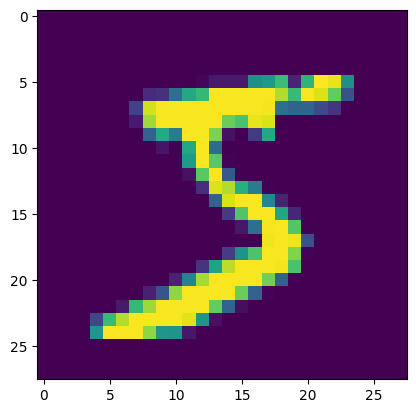

In [46]:
plt.imshow(train_data[0][0].squeeze())

In [47]:
train_dataloader=DataLoader(
    train_data,
    shuffle=True,
    batch_size=batch_size
)


In [67]:
data_item=next(iter(train_dataloader))
img,label=data_item
img,label

(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [69]:
img.shape

torch.Size([64, 1, 28, 28])

In [66]:
def imshowing(img):
  img=torchvision.utils.make_grid(img)
  # Move the tensor to CPU before converting to NumPy array
  np_img=img.cpu().numpy()
  plt.figure(figsize=(8,8))
  plt.imshow(np.transpose(np_img,(1,2,0)),cmap='grey')
  plt.xticks([])
  plt.yticks([])
  plt.show()

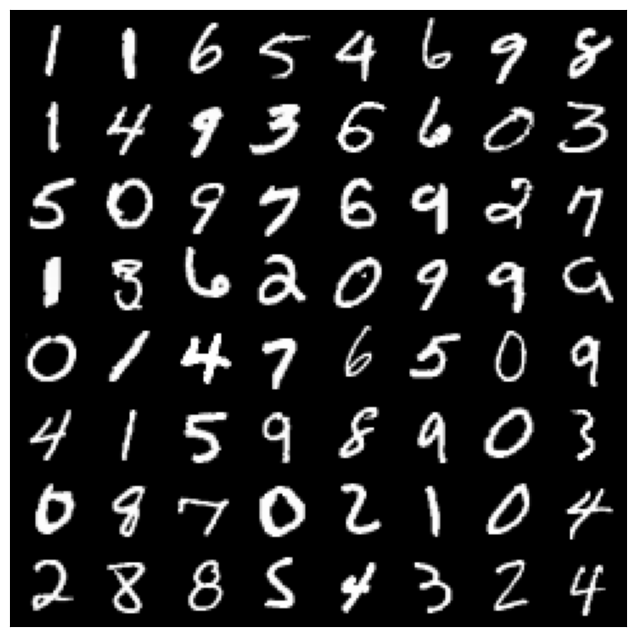

In [68]:
imshowing(img)

In [52]:
if torch.cuda.is_available():
  device="cuda"
else:
  device="cpu"
device

'cuda'

In [53]:
Z_dim=100
hidden_dim=128
X_dim=img.view(img.size(0),-1).size(1)

print(Z_dim,hidden_dim,X_dim)

100 128 784


In [70]:
class Gen(nn.Module):
  def __init__(self):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(Z_dim,hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim,X_dim),
        nn.Sigmoid()
    )
  def forward(self,x):
    return self.model(x)

In [71]:
G=Gen().to(device)

In [72]:
class Dis(nn.Module):
  def __init__(self):
    super().__init__()
    self.model=nn.Sequential(
        nn.Linear(X_dim,hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim,1),
        nn.Sigmoid()
    )
  def forward(self,x):
    return self.model(x)

In [73]:
D=Dis().to(device)

In [74]:
print(G)
print(D)

Gen(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=784, bias=True)
    (3): Sigmoid()
  )
)
Dis(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [78]:
g_optimizer=optim.Adam(G.parameters(),lr=0.3e-4)
d_optimizer=optim.Adam(D.parameters(),lr=3e-4)

Epoch:0,  G_loss:3.1798732677248243,    D_loss:0.25620103015034185


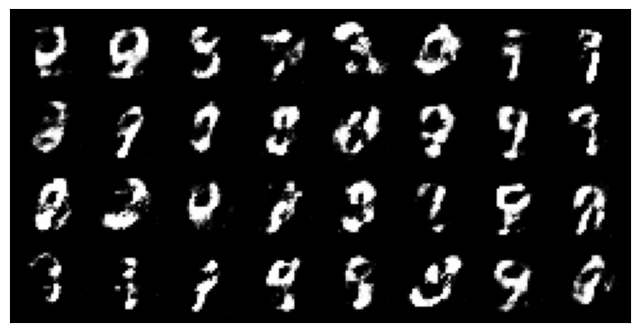

Epoch:1,  G_loss:3.698072077114699,    D_loss:0.16171294224382973


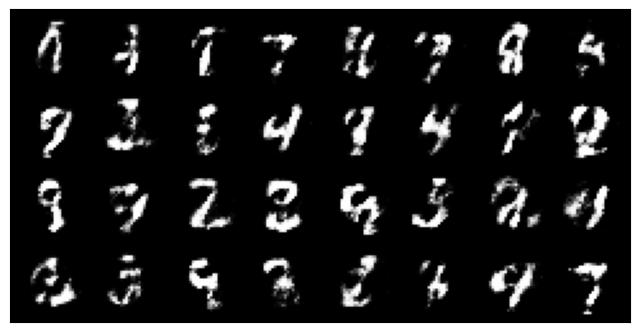

Epoch:2,  G_loss:3.9139005288894753,    D_loss:0.14668363641335894


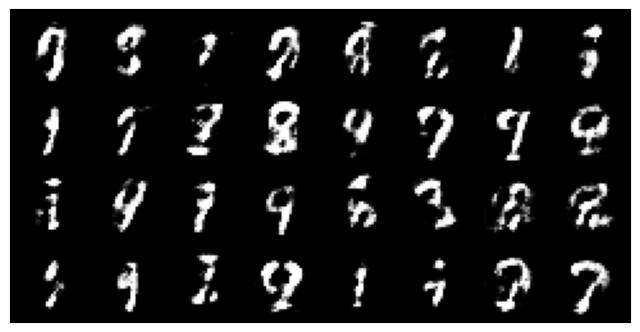

Epoch:3,  G_loss:4.041807566370283,    D_loss:0.14504943356346855


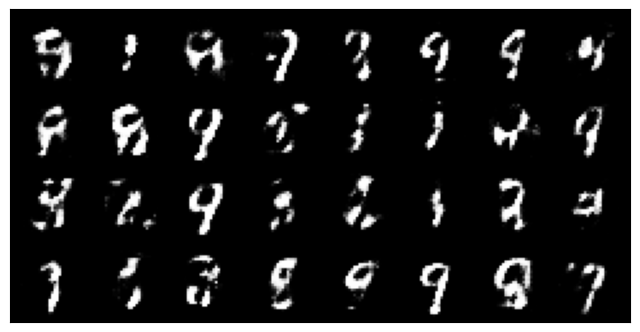

Epoch:4,  G_loss:4.176856455009883,    D_loss:0.14530144849899354


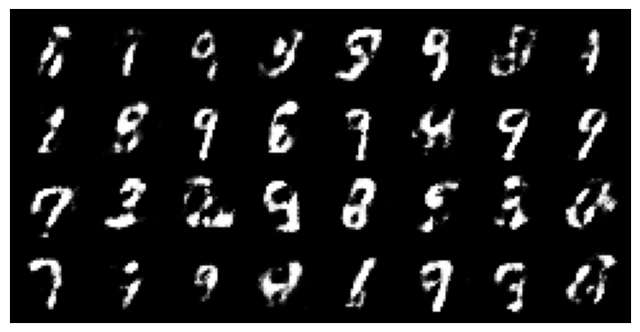

Epoch:5,  G_loss:4.283910740667315,    D_loss:0.14228238713051847


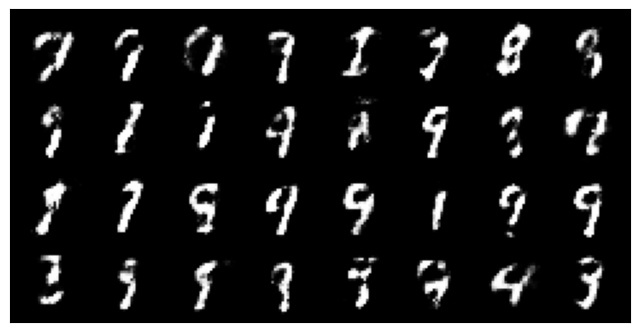

Epoch:6,  G_loss:4.394340586814799,    D_loss:0.1363990628388899


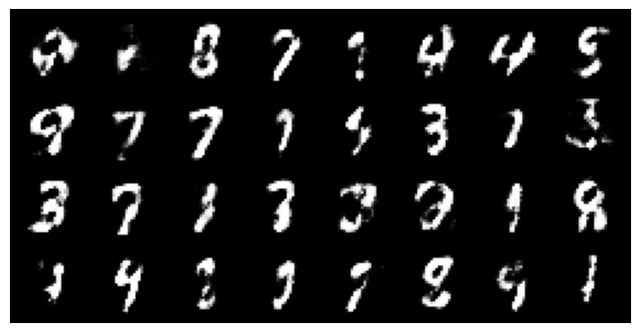

Epoch:7,  G_loss:4.51349764236255,    D_loss:0.13312875786855785


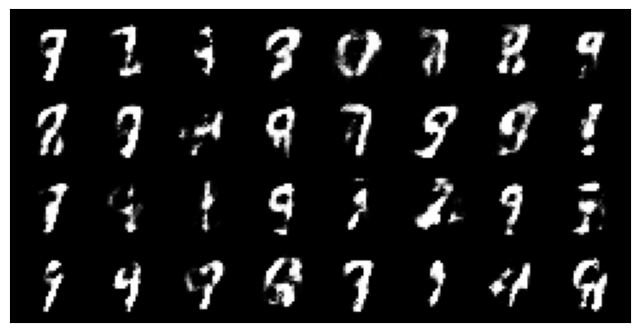

Epoch:8,  G_loss:4.573184045901431,    D_loss:0.12712452485601403


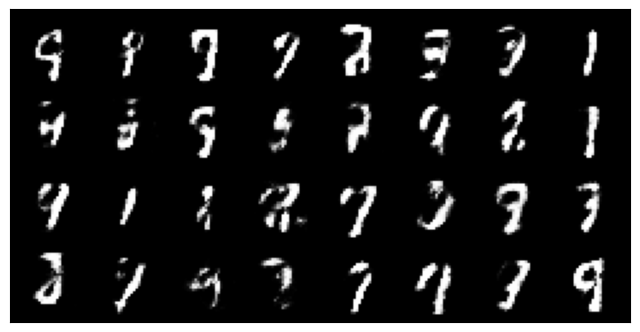

Epoch:9,  G_loss:4.681512748000464,    D_loss:0.1255684782947495


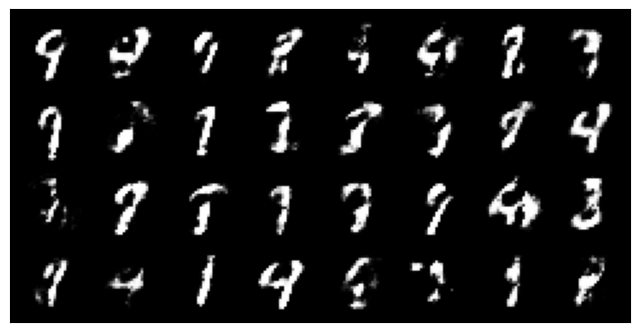

Epoch:10,  G_loss:4.752243963640128,    D_loss:0.12133245880225066


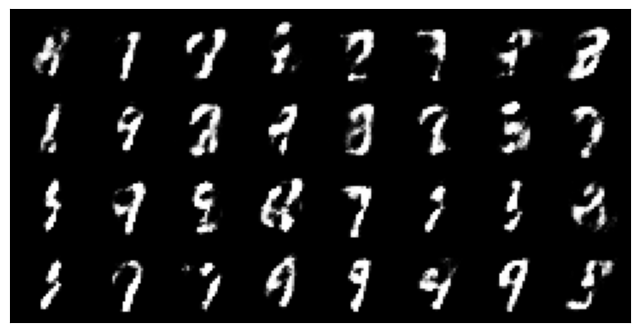

Epoch:11,  G_loss:4.823820340353797,    D_loss:0.1214174891530133


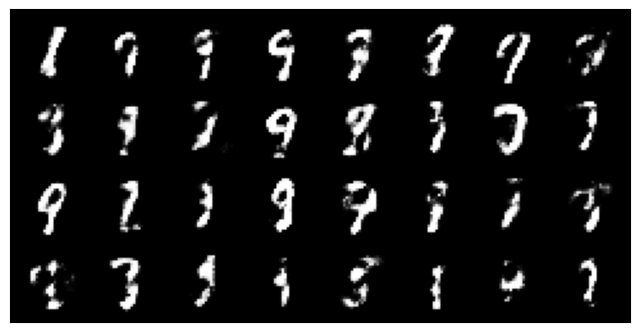

Epoch:12,  G_loss:4.839586682665322,    D_loss:0.12142508368549952


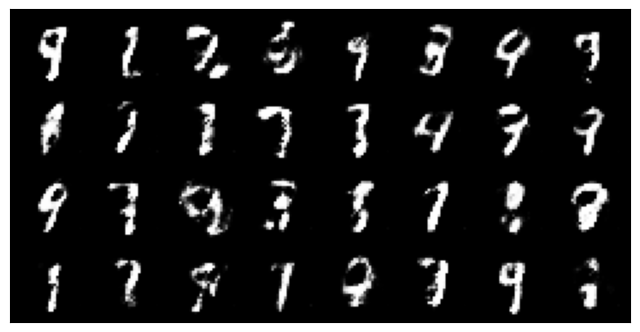

Epoch:13,  G_loss:4.8952769096980475,    D_loss:0.12259012897973502


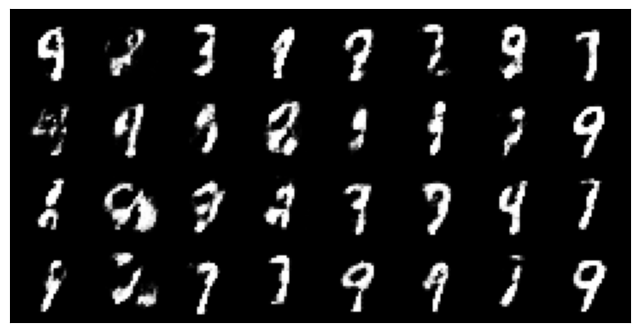

Epoch:14,  G_loss:4.877956514927878,    D_loss:0.12718996871461366


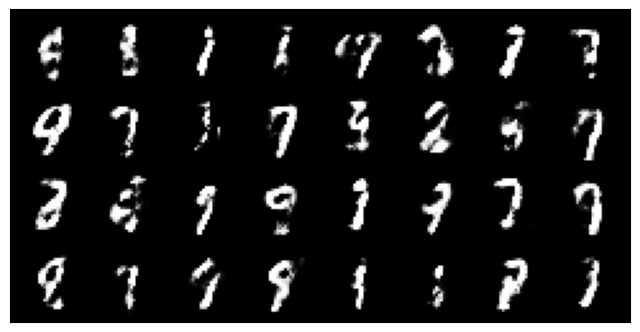

Epoch:15,  G_loss:4.873834172037364,    D_loss:0.13325697398865655


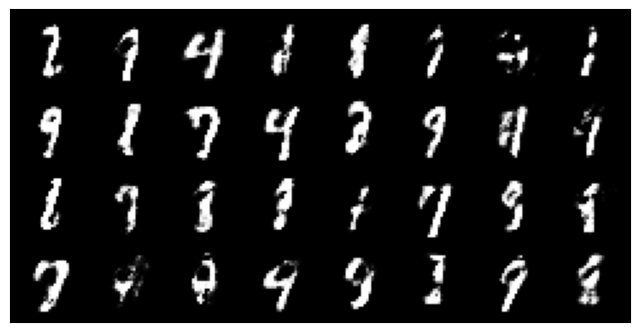

Epoch:16,  G_loss:4.863354536516072,    D_loss:0.13739161673925324


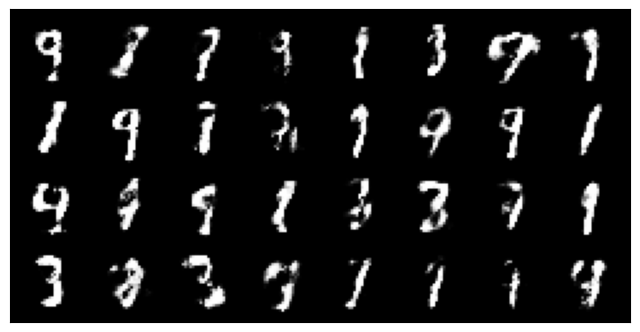

Epoch:17,  G_loss:4.839117714591118,    D_loss:0.1390497673001053


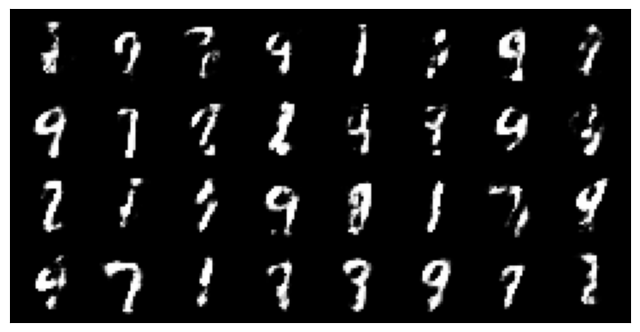

Epoch:18,  G_loss:4.8570569380005795,    D_loss:0.1444801946105098


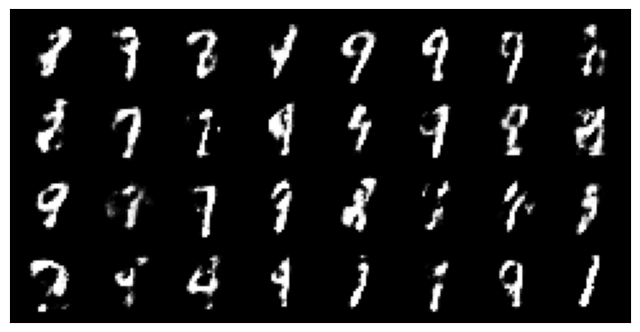

Epoch:19,  G_loss:4.842846934475116,    D_loss:0.14564749520661227


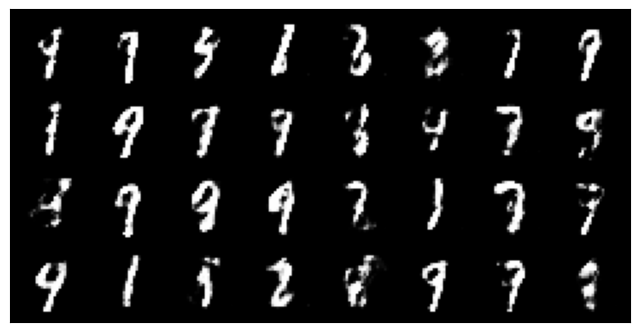

In [79]:
epochs=20
for epoch in range(epochs):
  G_loss_run=0.0
  D_loss_run=0.0
  for i,data in enumerate(train_dataloader):
    X,_=data
    X=X.to(device)
    # The error was here: It was referencing the global 'img' instead of the current batch 'X'
    X=X.view(X.size(0),-1) # Change made to correctly reshape X
    batch_size=X.size(0)

    one_labels=torch.ones(batch_size,1).to(device)
    zero_labels=torch.zeros(batch_size,1).to(device)

    z=torch.randn(batch_size,Z_dim).to(device)
    D_real=D(X)
    D_fake=D(G(z))

    D_real_loss=F.binary_cross_entropy(D_real,one_labels)
    D_fake_loss=F.binary_cross_entropy(D_fake,zero_labels)
    D_loss=D_real_loss+D_fake_loss

    d_optimizer.zero_grad()
    D_loss.backward()
    d_optimizer.step()

    z=torch.randn(batch_size,Z_dim).to(device)
    D_fake=D(G(z))
    G_loss=F.binary_cross_entropy(D_fake,one_labels)

    g_optimizer.zero_grad()
    G_loss.backward()
    g_optimizer.step()

    G_loss_run+=G_loss.item()
    D_loss_run+=D_loss.item()

  print('Epoch:{},  G_loss:{},    D_loss:{}'.format(epoch,G_loss_run/(i+1),D_loss_run/(i+1)))
  sample=G(z).detach()
  samples=sample.view(sample.size(0),1,28,28) # Change made here to use 'sample' not 'samples'
  imshowing(samples)